In [2]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
# Reading the titanic dataset

titanic_data = pd.read_csv("titanic.csv")

In [4]:
# Display basic information about the dataset

print("Basic information about the Titanic dataset:")
print(titanic_data.head())
print("Shape of the dataset:", titanic_data.shape)
print("Information about the dataset:")
print(titanic_data.info())
print("Null values count in the dataset:")
print(titanic_data.isnull().sum())

Basic information about the Titanic dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

In [5]:
# Drop unnecessary columns

titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [6]:
# Handle missing values

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace=True)

print("Total Null Values After Cleanup:", titanic_data.isnull().sum().sum())

Total Null Values After Cleanup: 0


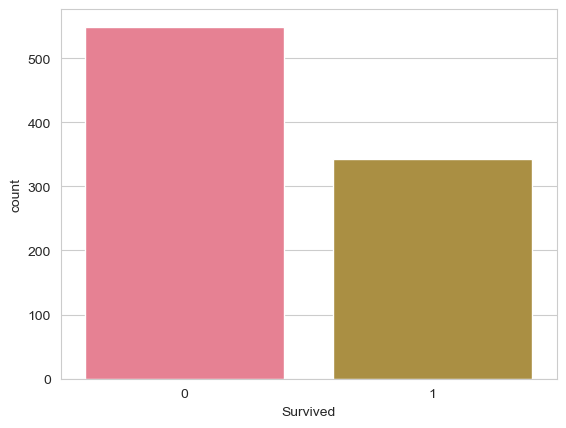

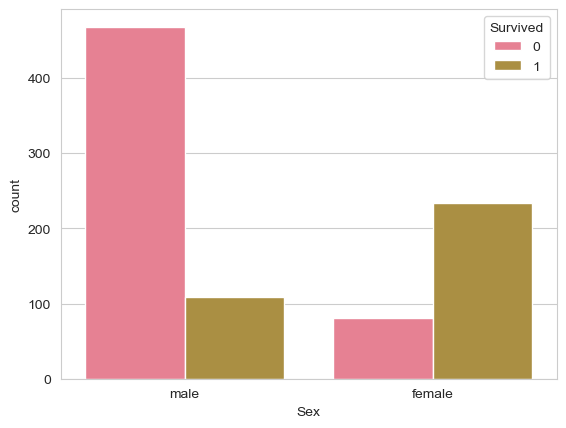

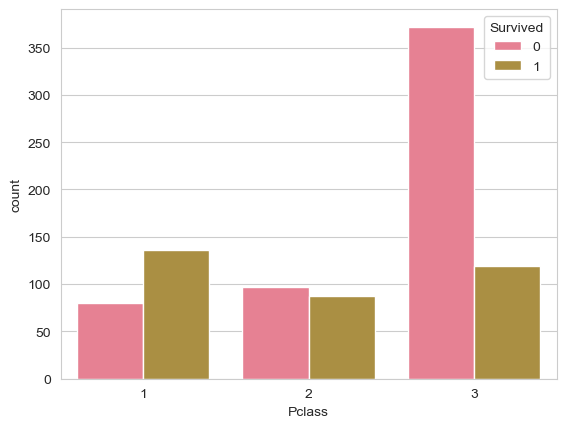

In [7]:
# Visualize some data distributions with modified colors

sns.set_palette("husl")
sns.set_style("whitegrid")
sns.countplot(x='Survived', data=titanic_data)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.show()

In [8]:
# Encode categorical variables

titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [9]:
# Split data into features and target

X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']

In [10]:
# Perform train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X: (891, 7)
Shape of X_train: (712, 7)
Shape of X_test: (179, 7)


In [11]:
# Model Initialization and Training

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

C:\Users\AQUIB HUSAIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Predictions on training data
X_train_prediction = logistic_model.predict(X_train)
print("Predictions on training data:", X_train_prediction)

# Accuracy on training data
train_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy Score of training data:", train_data_accuracy)


Predictions on training data: [0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0

In [13]:
# Predictions on testing data
X_test_prediction = logistic_model.predict(X_test)
print("Predictions on testing data:", X_test_prediction)

# Accuracy on testing data
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score of testing data:", test_data_accuracy)

Predictions on testing data: [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]
Accuracy score of testing data: 0.7821229050279329


In [14]:
# Hyperparameter tuning for Logistic Regression

logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=logistic_params, cv=5)
logistic_grid.fit(X_train, Y_train)
logistic_best = logistic_grid.best_estimator_
print("Logistic Regression Best Parameters:", logistic_grid.best_params_)

Logistic Regression Best Parameters: {'C': 0.1}


In [15]:
# Hyperparameter tuning for Random Forest

random_forest_params = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, None]}
random_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid=random_forest_params, cv=5)
random_forest_grid.fit(X_train, Y_train)
random_forest_best = random_forest_grid.best_estimator_
print("Random Forest Best Parameters:", random_forest_grid.best_params_)

Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 150}


In [16]:
# Hyperparameter tuning for Support Vector Machine

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=5)
svm_grid.fit(X_train, Y_train)
svm_best = svm_grid.best_estimator_
print("Support Vector Machine Best Parameters:", svm_grid.best_params_)

Support Vector Machine Best Parameters: {'C': 10, 'kernel': 'linear'}


In [17]:
# Evaluation metrics for each model

models = {'Logistic Regression': logistic_best,
          'Random Forest': random_forest_best,
          'Support Vector Machine': svm_best}

for name, model in models.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {model.get_params()}")
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    print(f"Train Accuracy: {accuracy_score(Y_train, train_predictions)}")
    print(f"Test Accuracy: {accuracy_score(Y_test, test_predictions)}")
    print(f"Classification Report:\n{classification_report(Y_test, test_predictions)}")

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Train Accuracy: 0.824438202247191
Test Accuracy: 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       100
           1       0.87      0.57      0.69        79

    accuracy                           0.77       179
   macro avg       0.80      0.75      0.75       179
weighted avg       0.79      0.77      0.76       179

Model: Random Forest
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min